In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import pandas as pd

In [2]:
#数据加载
(image_train, label_train),\
(image_test, label_test) = mnist.load_data()

In [3]:
print('train data shape: ', image_train.shape)
print('train label shape: ', label_train.shape)
print('test data shape: ', image_test.shape)
print('test data shape: ', label_test.shape)

train data shape:  (60000, 28, 28)
train label shape:  (60000,)
test data shape:  (10000, 28, 28)
test data shape:  (10000,)


In [4]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='Greys')

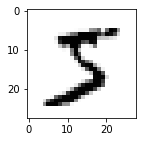

In [5]:
plot_image(image_train[0])

In [6]:
def plot_images_labels_predictions(images, labels, predictions, index_start, num = 10):
    index = index_start
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    for i in range(num):
        plt_sub = plt.subplot(5, 5, i+1)
        plt_sub.imshow(images[index], cmap='binary')
        title = 'label=' + str( labels[index] )
        if len(predictions) > 0:
            title += ', pred=' + str(predictions[index])
        plt_sub.set_title(title, fontsize=10)
        plt_sub.set_xticks([])
        plt_sub.set_yticks([])
        index += 1

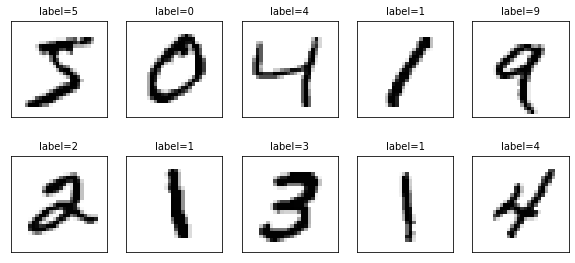

In [7]:
plot_images_labels_predictions(image_train, label_train, [], 0)

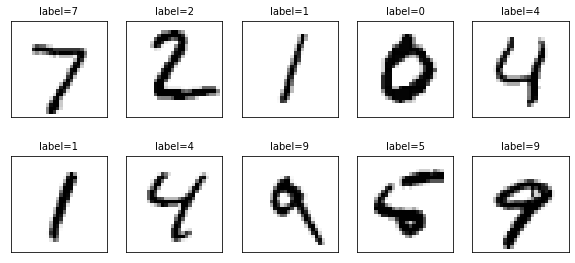

In [8]:
plot_images_labels_predictions(image_test, label_test, [], 0)

In [9]:
# 数据平坦化
#image_train_flat = image_train.reshape(-1, 784)
#image_test_flat = image_test.reshape(-1, 784)

In [10]:
#数据归一化
image_train_normalize = image_train / 255
image_test_normalize = image_test / 255

In [11]:
# One hot
print(label_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [12]:
label_train_onehot = keras.utils.to_categorical(label_train)
label_test_onehot = keras.utils.to_categorical(label_test)
print(label_train_onehot[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [13]:
# Create Model
# 梯度消失 / 弥散(爆炸)
# 批(量)归一化
# 过拟合 Dropout
model = keras.models.Sequential()
model.add( keras.layers.Flatten(input_shape=(28, 28)) )
model.add( keras.layers.Dense(256, activation='relu') )
for _ in range(20):
    #model.add( keras.layers.Dense(128, activation='relu') )
    model.add( keras.layers.Dense(128) )
    model.add( keras.layers.BatchNormalization() )
    model.add( keras.layers.Activation('relu') )    
    model.add( keras.layers.Dropout(0.1) )
model.add( keras.layers.Dense(10, activation='softmax') )
#relu: max(0, x)
# softmax: 将向量变成概率分布 y = [e^x1/sum, e^x2/sum, e^x3/sum] -> [y1, y2, y3]
# sum = e^x1 + e^x2 + e^x3
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [14]:
# Compile model
# sparse_categorical_crossentropy ?
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['categorical_accuracy'])

In [15]:
# Train
history = model.fit(image_train_normalize, label_train_onehot,
                    validation_split = 0.1, epochs=10, batch_size=200, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 20s - loss: 2.0603 - categorical_accuracy: 0.2330 - val_loss: 2.1845 - val_categorical_accuracy: 0.2398
Epoch 2/10
54000/54000 - 9s - loss: 1.2066 - categorical_accuracy: 0.5317 - val_loss: 0.7659 - val_categorical_accuracy: 0.6982
Epoch 3/10
54000/54000 - 8s - loss: 0.7340 - categorical_accuracy: 0.7117 - val_loss: 0.5279 - val_categorical_accuracy: 0.7677
Epoch 4/10
54000/54000 - 9s - loss: 0.5227 - categorical_accuracy: 0.8260 - val_loss: 0.3310 - val_categorical_accuracy: 0.9203
Epoch 5/10
54000/54000 - 9s - loss: 0.3517 - categorical_accuracy: 0.9134 - val_loss: 0.1909 - val_categorical_accuracy: 0.9572
Epoch 6/10
54000/54000 - 8s - loss: 0.2884 - categorical_accuracy: 0.9333 - val_loss: 0.1791 - val_categorical_accuracy: 0.9595
Epoch 7/10
54000/54000 - 8s - loss: 0.2508 - categorical_accuracy: 0.9416 - val_loss: 0.1430 - val_categorical_accuracy: 0.9682
Epoch 8/10
54000/54000 - 9s - loss: 0.2235 - categoric

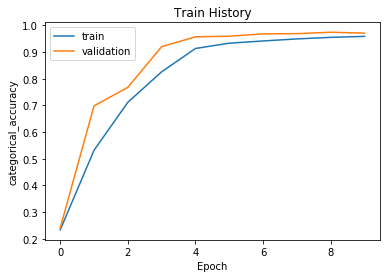

In [16]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='best')

show_train_history(history, 'categorical_accuracy','val_categorical_accuracy')  

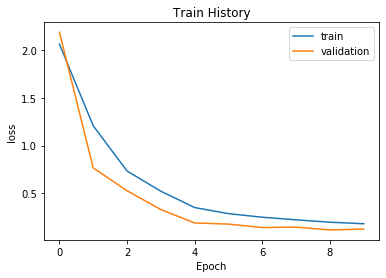

In [17]:
show_train_history(history, 'loss', 'val_loss')

In [18]:
model.evaluate(image_test_normalize, label_test_onehot, verbose=2)

10000/1 - 3s - loss: 0.0782 - categorical_accuracy: 0.9679


[0.15061255789659916, 0.9679]

In [19]:
#Predict
pred = model.predict_classes(image_test_normalize)

In [20]:
print(pred[0:10])

[7 2 1 0 4 1 4 9 5 9]


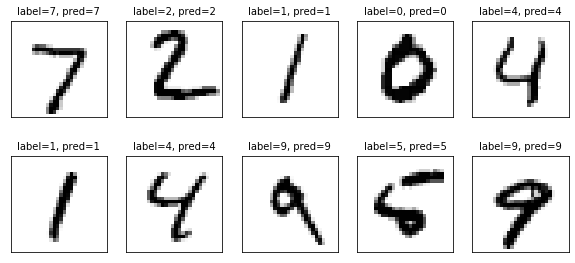

In [21]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=0)

In [22]:
#错误数据分析
pd.crosstab(label_test, pred, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,0,0,1,0,2,6,0,3,1
1,0,1121,5,2,0,2,1,0,4,0
2,7,0,1005,9,1,0,2,4,4,0
3,0,0,3,984,0,14,0,3,4,2
4,2,1,6,1,935,0,3,1,3,30
5,6,0,0,2,1,874,4,0,3,2
6,6,2,1,0,3,9,930,0,7,0
7,2,3,15,8,0,0,1,973,1,25
8,3,0,1,11,1,12,1,2,938,5


In [23]:
df = pd.DataFrame({'label':label_test, 'predict':pred})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [24]:
df[(df.label==5)&(df.predict==3)]

,label,predict
4360,5,3
5937,5,3


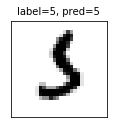

In [25]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=340, num=1)

In [26]:
df[(df.label==9)&(df.predict==4)]

,label,predict
1901,9,4
3985,9,4
4093,9,4
4154,9,4
4369,9,4
4823,9,4
9587,9,4
9808,9,4


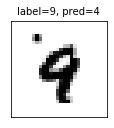

In [27]:
plot_images_labels_predictions(image_test, label_test, pred, index_start=9587, num=1)